# Implementation and analysis of **Gradient Descent** from scratch (regressor)

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression, make_classification
from sklearn.linear_model import SGDClassifier
from math import log10


# Gradient Descent : regression (Loss: squared loss)

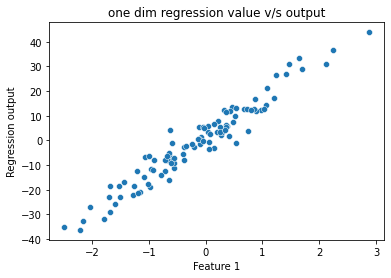

coef: 15.501128690525178
bias: 2.4


In [ ]:
## Creating a dummy datapoints using scikit-learn's make_regression method
bias = 2.4
X, y, coef = make_regression(n_samples=100, n_features=2, n_informative=2, coef=True, bias=bias, random_state=12 )
X = X[:,0].reshape((-1,1)) ## obtain one dimentional value

plt.title(f"one dim regression value v/s output")
plt.xlabel("Feature 1")
plt.ylabel("Regression output")
sns.scatterplot(x=X[:,0], y=y)
plt.show()

print(f"coef: {coef[0]}\nbias: {bias}")

In [ ]:
## Defining the functions to compute the derivative of loss(L) w.r.t 'w' and 'b'
def dL_by_dw(x_i, y_i, w, b):
  return -2 * x_i * (y_i - np.dot(w,x_i)+b)

def dL_by_db(x_i, y_i, w, b):
  return -2  * (y_i - np.dot(w,x_i)+b)

In [ ]:
######################################## gradient descent implementation ########################################
n_epoch = 110
learning_rate = 0.0001

## initialzing weights and bias
w = np.zeros(X.shape[1])
b = 0

loss_list = []; w_list = []; b_list = []

for epoch in range(n_epoch):
  fin_dw = 0
  fin_db = 0
  for i in range(len(X)):
    x_i = X[i]
    y_i = y[i]

    fin_dw += dL_by_dw(x_i, y_i, w, b)
    fin_db += dL_by_db(x_i, y_i, w, b)

  w = w - learning_rate * fin_dw
  b = b - learning_rate * fin_db
  
  ## Computing the loss @ the end of each epoch
  loss = 0
  for i in range(len(X)):
    y_hat = np.dot(w,X[i]) + b
    loss = loss + (y[i] - y_hat)**2

  loss_list.append(loss/len(X))
  w_list.append(w)
  b_list.append(b)

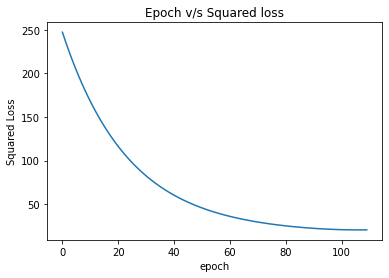

 Minimum loss is @ epoch 106
 Best weight: [13.41594197] and bias: 2.1442029130576183

 Actual weight: 15.501128690525178
 GD weight: [13.41594197]
 Actual bias: 2.4
 GD bias: 2.1442029130576183


In [ ]:
## Plot to compare the loss on every epoch
plt.title("Epoch v/s Squared loss")
sns.lineplot(x=[e for e in range(n_epoch)], y=loss_list)
plt.xlabel("epoch")
plt.ylabel("Squared Loss")
plt.show()

min_loss_epoch = np.argmin(loss_list)
best_weight = w_list[min_loss_epoch]
best_bias = b_list[min_loss_epoch]

print(f" Minimum loss is @ epoch {min_loss_epoch}")
print(f" Best weight: {best_weight} and bias: {best_bias}")
print(f"\n Actual weight: {coef[0]}\n GD weight: {best_weight}")
print(f" Actual bias: {bias}\n GD bias: {best_bias}")